# Real-world Data Science: Applications of Visualization
## Qinyu Chen

In [2]:
# setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## 1 EDA

In [3]:
data = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")

In [4]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [6]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\cj\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


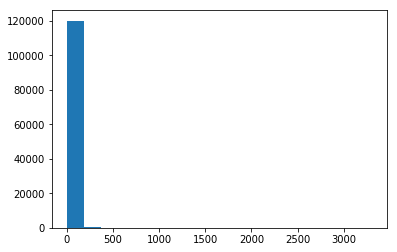

In [7]:
plt.hist(data["price"], bins=18)
plt.show()

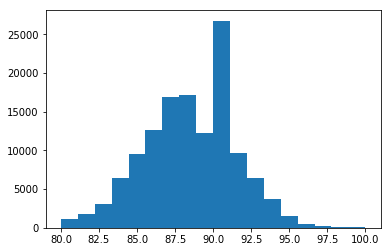

In [8]:
plt.hist(data["points"], bins=18)
plt.show()

## 2 Data Preprocessing

In [9]:
# id is not related; designation, region_2,taster_twitter_handle too many nan
data = data.drop(columns = ['Unnamed: 0','region_2','designation','taster_twitter_handle'])
data = data.drop_duplicates()
data = data.dropna()
data = data.reset_index(drop=True)

In [10]:
# try
data = data.sample(n=1000)
data = data.reset_index(drop=True)

In [11]:
data.shape

(1000, 10)

In [12]:
data.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery
0,Argentina,"This Malbec blend is ripe and woodsy, with ced...",92,30.0,Mendoza Province,Uco Valley,Michael Schachner,Finca la Celia 2011 Supremo Red (Uco Valley),Red Blend,Finca la Celia
1,US,"Dust, black cherries and a hint of tarragon ar...",85,15.0,California,San Lucas,Matt Kettmann,Lockwood 2013 Merlot (San Lucas),Merlot,Lockwood
2,US,"Pretty and pink, this light-colored wine has s...",89,16.0,California,Potter Valley,Jim Gordon,McFadden 2015 Fontaine Rosé (Potter Valley),Rosé,McFadden
3,Italy,"Linear and mineral driven, this intriguing whi...",93,20.0,Veneto,Soave Classico,Kerin O’Keefe,I Stefanini 2015 Monte di Fice (Soave Classico),Garganega,I Stefanini
4,US,This delightful and refreshing wine is atypica...,92,20.0,Oregon,Rogue Valley,Paul Gregutt,Leah Jørgensen Cellars 2014 Panner-Hanson Vine...,Sauvignon Blanc,Leah Jørgensen Cellars


In [13]:
data.dtypes

country         object
description     object
points           int64
price          float64
province        object
region_1        object
taster_name     object
title           object
variety         object
winery          object
dtype: object

In [14]:
# cat: country, province, region_1, taster_name, title, variety, winery
# text: description
# quant: points, price


# one-hot encoding for cate 
data_cat = data[["country","province","region_1","taster_name","title","variety","winery"]]
data_cat = pd.get_dummies(data_cat)
data_cat.head()

,country_Argentina,country_Australia,country_Canada,country_France,country_Italy,country_Spain,country_US,province_Alsace,province_Andalucia,province_Australia Other,...,winery_Yorba,winery_Yves Leccia,winery_Zagan's Fire,winery_Zenato,winery_Zepaltas,winery_Ziata,winery_Zimri Cellars,winery_Zudugarai,winery_ecoVINO,winery_àMaurice
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# remove stop words, tokenization, stem, 


data['description'].fillna('unknown', inplace=True)


# preprocessing text
stopwords = []
with open('stopwords_english.txt') as fsw:
    for word in fsw.readlines():
        word = word.strip('\n')
        stopwords.append(word)
fsw.close()

def preprocess_text(text):
    text = text.apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    text = text.apply(lambda x: " ".join(x.strip() for x in str(x).split()))
    text = text.apply(lambda x: "".join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))
    text = text.str.replace('[^\w\s]', '')
    text = text.str.replace('\d+', '')
    text = text.apply(lambda x: " ".join([word for word in str(x).split() if word not in (stopwords)]))
    text = text.astype(str)
    return text

data['description'] = preprocess_text(data['description'])


# stem
ps = nltk.stem.PorterStemmer()
def stem(text):
    text = text.apply(lambda x: " ".join([ps.stem(x) for x in str(x).split()]))
    return text

data['description'] = stem(data['description'])

In [18]:
data.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery
0,Argentina,malbec blend ripe woodsi cedari boysenberri ca...,92,30.0,Mendoza Province,Uco Valley,Michael Schachner,Finca la Celia 2011 Supremo Red (Uco Valley),Red Blend,Finca la Celia
1,US,dust black cherri hint tarragon ari nose wine ...,85,15.0,California,San Lucas,Matt Kettmann,Lockwood 2013 Merlot (San Lucas),Merlot,Lockwood
2,US,pretti pink lightcolor wine subtl peach aroma ...,89,16.0,California,Potter Valley,Jim Gordon,McFadden 2015 Fontaine Rosé (Potter Valley),Rosé,McFadden
3,Italy,linear miner driven intrigu white open aroma b...,93,20.0,Veneto,Soave Classico,Kerin O’Keefe,I Stefanini 2015 Monte di Fice (Soave Classico),Garganega,I Stefanini
4,US,delight refresh wine atyp right way inten arom...,92,20.0,Oregon,Rogue Valley,Paul Gregutt,Leah Jørgensen Cellars 2014 Panner-Hanson Vine...,Sauvignon Blanc,Leah Jørgensen Cellars


In [19]:
# Split train test

train, test = train_test_split(data,test_size=0.2, random_state=0)

In [ ]:
# normalize


# TF-IDF

vectorizer = TfidfVectorizer(sublinear_tf = True)




## 3 ML